In [426]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [427]:
df_test=pd.read_excel('E:/flight_Test.xlsx',parse_dates=['Date_of_Journey'])
df_train=pd.read_excel('E:/flight_Train.xlsx',parse_dates=['Date_of_Journey'])

In [428]:
df_flight=df_train.append(df_test)

In [429]:
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


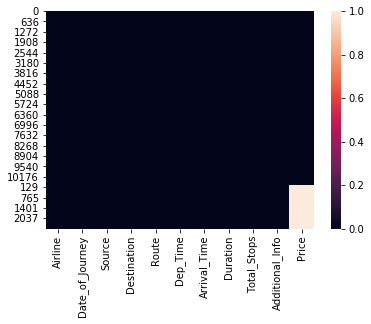

In [430]:
#checking for any missing data
sns.heatmap(df_flight.isnull())

In [431]:
df_flight.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [432]:
df_flight['month']=df_flight['Date_of_Journey'].dt.month_name()
df_flight['year']=df_flight['Date_of_Journey'].dt.year
df_flight['day']=df_flight['Date_of_Journey'].dt.day_name()

In [433]:
df_flight['Arrival_Time']=df_flight['Arrival_Time'].str.split(' ').str[0]

In [434]:
df_flight['Arrival_Hour']=df_flight['Arrival_Time'].str.split(':').str[0]
df_flight['Arrival_Minute']=df_flight['Arrival_Time'].str.split(':').str[1]

df_flight['Arrival_Hour']=df_flight['Arrival_Hour'].astype(int)
df_flight['Arrival_Minute']=df_flight['Arrival_Minute'].astype(int)

In [435]:
df_flight['Total_Stops']=df_flight['Total_Stops'].replace('non-stop',int(0))
df_flight['Total_Stops']=df_flight['Total_Stops'].replace('1 stop',1)
df_flight['Total_Stops']=df_flight['Total_Stops'].replace('2 stops',2)
df_flight['Total_Stops']=df_flight['Total_Stops'].replace('3 stops',3)
df_flight['Total_Stops']=df_flight['Total_Stops'].replace('4 stops',4)

In [436]:
df_flight['Total_Stops'].dropna(inplace=True)

In [437]:
df_flight['Arrival_Hour']=df_flight['Arrival_Time'].str.split(':').str[0]
df_flight['Arrival_Minute']=df_flight['Arrival_Time'].str.split(':').str[1]

df_flight['Arrival_Hour']=df_flight['Arrival_Hour'].astype(int)
df_flight['Arrival_Minute']=df_flight['Arrival_Minute'].astype(int)

In [438]:
df_flight['Dep_Hour']=df_flight['Dep_Time'].str.split(':').str[0]
df_flight['Dep_Minute']=df_flight['Dep_Time'].str.split(':').str[1]

df_flight['Dep_Hour']=df_flight['Dep_Hour'].astype(int)
df_flight['Dep_Minute']=df_flight['Dep_Minute'].astype(int)

In [439]:
df_flight['Route_1']=df_flight['Route'].str.split('→ ').str[0]
df_flight['Route_2']=df_flight['Route'].str.split('→ ').str[1]
df_flight['Route_3']=df_flight['Route'].str.split('→ ').str[2]
df_flight['Route_4']=df_flight['Route'].str.split('→ ').str[3]
df_flight['Route_5']=df_flight['Route'].str.split('→ ').str[4]

In [440]:
df_flight['Route_1'].fillna('None',inplace=True)
df_flight['Route_2'].fillna('None',inplace=True)
df_flight['Route_3'].fillna('None',inplace=True)
df_flight['Route_4'].fillna('None',inplace=True)
df_flight['Route_5'].fillna('None',inplace=True)

In [441]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_flight["Additional_Info"] = le.fit_transform(df_flight["Additional_Info"])
df_flight["Airline"] = le.fit_transform(df_flight["Airline"])
df_flight["Destination"] = le.fit_transform(df_flight["Destination"])
df_flight["Source"] = le.fit_transform(df_flight["Source"])
df_flight["month"] = le.fit_transform(df_flight["month"])
df_flight["day"] = le.fit_transform(df_flight["day"])
df_flight["Route_1"] = le.fit_transform(df_flight["Route_1"])
df_flight["Route_2"] = le.fit_transform(df_flight["Route_2"])
df_flight["Route_3"] = le.fit_transform(df_flight["Route_3"])
df_flight["Route_4"] = le.fit_transform(df_flight["Route_4"])
df_flight["Route_5"] = le.fit_transform(df_flight["Route_5"])

In [442]:
df_flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'year', 'day', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [447]:
df_flight.drop(['Date_of_Journey','Dep_Time','year','Arrival_Time','Duration','Route'],axis=1,inplace=True)

In [448]:
df_flight.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'month', 'day', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [449]:
df_flight.dropna(inplace=True)

In [450]:
df_train=df_flight[0:10683]
df_test=df_flight[10683:]
df_test.drop(['Price'],axis=1,inplace=True)

In [451]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,month,day,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5


In [452]:
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0.0,8,3897.0,4,3,1,10,22,20,0,13,24,12,4
1,1,3,0,2.0,8,7662.0,2,2,13,15,5,50,2,25,1,3,4
2,4,2,1,2.0,8,13882.0,6,0,4,25,9,25,3,32,4,5,4
3,3,3,0,1.0,8,6218.0,1,4,23,30,18,5,2,34,3,12,4
4,3,0,5,1.0,8,13302.0,2,4,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0.0,8,4107.0,6,6,22,25,19,55,2,5,24,12,4
10679,1,3,0,0.0,8,4145.0,0,2,23,20,20,45,2,5,24,12,4
10680,4,0,2,0.0,8,7229.0,0,2,11,20,8,20,0,13,24,12,4
10681,10,0,5,0.0,8,12648.0,2,4,14,10,11,30,0,13,24,12,4


In [453]:
df_train.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Total_Stops         0.317109
Additional_Info    -1.779689
Price               1.812405
month              -0.340353
day                -0.065171
Arrival_Hour       -0.370146
Arrival_Minute      0.110945
Dep_Hour            0.112924
Dep_Minute          0.167234
Route_1            -0.618513
Route_2             1.457157
Route_3             0.582579
Route_4            -2.103798
Route_5           -16.440835
dtype: float64

In [462]:
#removing skewness using log transform
for col in df_train.columns:
    if df_train.skew().loc[col]>0.55:
        df_train[col]=np.log1p(df_train[col])

In [463]:
for i in df_train.columns:
    print(df_train[i].value_counts())

1.609438    3849
1.386294    2053
0.693147    1751
1.945910    1196
2.197225     818
2.397895     479
0.000000     319
1.098612     194
2.079442      13
1.791759       6
2.484907       3
2.302585       1
Name: Airline, dtype: int64
2    4536
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64
0.693147    4536
0.000000    2871
1.098612    1265
1.791759     932
1.386294     697
1.609438     381
Name: Destination, dtype: int64
1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64
8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
2       1
9       1
1       1
Name: Additional_Info, dtype: int64
9.236300    258
9.291459    212
8.885994    162
8.477412    160
8.481359    131
           ... 
9.380842      1
9.062652      1
9.489335      1
9.189219      1
9.434603      1
Name: Price, Length: 1870, dtype: int64
3    2535
4    2211
5    2074
6    1406
2    1075
1     957
0     424
Name: month, dtype: int64
4    2290
0    18

In [464]:
df_train.skew()

Airline            -0.680164
Source             -0.424023
Destination         0.283053
Total_Stops         0.317109
Additional_Info    -1.779689
Price              -0.254592
month              -0.340353
day                -0.065171
Arrival_Hour       -0.370146
Arrival_Minute      0.110945
Dep_Hour            0.112924
Dep_Minute          0.167234
Route_1            -0.618513
Route_2            -0.844695
Route_3             0.238185
Route_4            -2.103798
Route_5           -16.440835
dtype: float64

In [465]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_train))
print(zscore)
print(np.where(zscore>3))
df_train_new=df_train[(zscore<3).all(axis=1)]

[[0.1735073  1.65835945 1.89740951 ... 1.29674414 0.40819941 0.06250046]
 [1.48441487 0.89001433 1.30041423 ... 2.14058323 3.05456196 0.06250046]
 [0.24851068 0.04055641 0.06332714 ... 0.89358023 2.28505943 0.06250046]
 ...
 [0.24851068 1.65835945 0.66032242 ... 1.29674414 0.40819941 0.06250046]
 [1.73967266 1.65835945 1.89740951 ... 1.29674414 0.40819941 0.06250046]
 [1.48441487 0.04055641 0.06332714 ... 0.89358023 2.28505943 0.06250046]]
(array([    1,    15,    31,    49,    56,    73,   109,   125,   135,
         155,   209,   251,   264,   336,   348,   378,   399,   402,
         402,   432,   432,   452,   525,   530,   553,   588,   656,
         657,   665,   667,   672,   685,   702,   712,   767,   785,
         790,   790,   794,   822,   848,   848,   856,   856,   881,
         893,   919,   919,   935,   958,   980,  1013,  1020,  1043,
        1045,  1083,  1099,  1127,  1154,  1197,  1204,  1209,  1212,
        1218,  1218,  1272,  1339,  1362,  1373,  1373,  1380,  1

In [466]:
print('Before removing outliers:',df_train.shape)
print('After removing outliers:',df_train_new.shape)

Before removing outliers: (10682, 17)
After removing outliers: (10037, 17)


In [467]:
#separating into input and output variables
df_x=df_train_new.drop(columns=['Price'])
y=pd.DataFrame(df_train_new['Price'])

In [468]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [469]:
x.shape

(10037, 16)

In [470]:
y.shape

(10037, 1)

In [471]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [472]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.6263302030570931
r2 score corresponding to 43 is 0.6077003496248179
r2 score corresponding to 44 is 0.6283337568448917
r2 score corresponding to 45 is 0.6122563244303569
r2 score corresponding to 46 is 0.6164636635152704
r2 score corresponding to 47 is 0.624172529794397
r2 score corresponding to 48 is 0.6191223309789333
r2 score corresponding to 49 is 0.6104193998511522
r2 score corresponding to 50 is 0.624592881021135
r2 score corresponding to 51 is 0.5930201819674198
r2 score corresponding to 52 is 0.6289619460396887
r2 score corresponding to 53 is 0.599192586664314
r2 score corresponding to 54 is 0.6186265769607864
r2 score corresponding to 55 is 0.6187764995610041
r2 score corresponding to 56 is 0.6221621328353419
r2 score corresponding to 57 is 0.6237628511561364
r2 score corresponding to 58 is 0.6164244498630461
r2 score corresponding to 59 is 0.6163435271366037
r2 score corresponding to 60 is 0.6127914379087509
r2 score corresponding to 61 is 0.

In [473]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 5}

In [474]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.8161660274808328
r2 score corresponding to 43 is 0.8034907552965579
r2 score corresponding to 44 is 0.7969917771046644
r2 score corresponding to 45 is 0.8164717970001218
r2 score corresponding to 46 is 0.8046322376016389
r2 score corresponding to 47 is 0.8104355614902791
r2 score corresponding to 48 is 0.7877821366627455
r2 score corresponding to 49 is 0.8019996468435892
r2 score corresponding to 50 is 0.8157655025716819
r2 score corresponding to 51 is 0.7950084293867594
r2 score corresponding to 52 is 0.829668147352094
r2 score corresponding to 53 is 0.789235601812571
r2 score corresponding to 54 is 0.809373102809452
r2 score corresponding to 55 is 0.801391156442027
r2 score corresponding to 56 is 0.7911832966862453
r2 score corresponding to 57 is 0.8036994529552888
r2 score corresponding to 58 is 0.8143856906562905
r2 score corresponding to 59 is 0.8080829466285147
r2 score corresponding to 60 is 0.7931921723844361
r2 score corresponding to 61 is 0.7

In [476]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output KNN Regression  is performing well

Mean r2 score for Linear Regression: 0.6093230963949587
Standard Deviation in r2 score for Linear Regression: 0.016417755913385637

Mean r2 score for KNN Regression: 0.7997421021966302
Standard Deviation in r2 score for KNN Regression: 0.009072624215766349


In [477]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [481]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.0001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.6262862246976229
r2 score corresponding to 43 is 0.6076922064883095
r2 score corresponding to 44 is 0.6282852228787021
r2 score corresponding to 45 is 0.6122581567231993
r2 score corresponding to 46 is 0.6164394838862882
r2 score corresponding to 47 is 0.6242129644458152
r2 score corresponding to 48 is 0.6190880063400409
r2 score corresponding to 49 is 0.6103748404829656
r2 score corresponding to 50 is 0.6246124332246051
r2 score corresponding to 51 is 0.5930270895325418
r2 score corresponding to 52 is 0.6290002799270912
r2 score corresponding to 53 is 0.5992260878963571
r2 score corresponding to 54 is 0.6186117198474762
r2 score corresponding to 55 is 0.6187263152087117
r2 score corresponding to 56 is 0.6221159878304593
r2 score corresponding to 57 is 0.6236843564174066
r2 score corresponding to 58 is 0.6164452596809273
r2 score corresponding to 59 is 0.6163198693308121
r2 score corresponding to 60 is 0.6128355462888276
r2 score corresponding to 61 is

In [482]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.6093234595899599
Standard Deviation in r2 score for Lasso Regression: 0.016398224907715742


In [480]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [484]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.6263206573877469
r2 score corresponding to 43 is 0.6076975550504764
r2 score corresponding to 44 is 0.6283275898477776
r2 score corresponding to 45 is 0.6122560650467775
r2 score corresponding to 46 is 0.6164591840263829
r2 score corresponding to 47 is 0.624190197866681
r2 score corresponding to 48 is 0.6191048189271808
r2 score corresponding to 49 is 0.6104071283731499
r2 score corresponding to 50 is 0.6245940688510273
r2 score corresponding to 51 is 0.5930235043085929
r2 score corresponding to 52 is 0.6289587875789959
r2 score corresponding to 53 is 0.5991993105723843
r2 score corresponding to 54 is 0.6186185974473877
r2 score corresponding to 55 is 0.6187654879515287
r2 score corresponding to 56 is 0.6221467132184898
r2 score corresponding to 57 is 0.6237472083045996
r2 score corresponding to 58 is 0.6164184287703902
r2 score corresponding to 59 is 0.616325699155738
r2 score corresponding to 60 is 0.6127872051077137
r2 score corresponding to 61 is 0

In [485]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.6093236636685468
Standard Deviation in r2 score for Ridge Regression: 0.016412137935453663


In [487]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [488]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=500)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.9107666863492335
Standard Deviation in r2 score for Gradient Boosting Regression: 0.006730897605074264


In [489]:
#checking maximum r2 score corresponding to GradientBoostingRegressor
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.9222839158148187
r2 score corresponding to 43 is 0.9139830281999682
r2 score corresponding to 44 is 0.9176576256298077
r2 score corresponding to 45 is 0.909502967123524
r2 score corresponding to 46 is 0.9069234422317077
r2 score corresponding to 47 is 0.9104548882923327
r2 score corresponding to 48 is 0.9022445330663411
r2 score corresponding to 49 is 0.9212664638135807
r2 score corresponding to 50 is 0.9170723350400648
r2 score corresponding to 51 is 0.9060223558968195
r2 score corresponding to 52 is 0.9238750818641713
r2 score corresponding to 53 is 0.9011472949793311
r2 score corresponding to 54 is 0.9129498510418621
r2 score corresponding to 55 is 0.9106000516082468
r2 score corresponding to 56 is 0.9127176893717263
r2 score corresponding to 57 is 0.9151974775337391
r2 score corresponding to 58 is 0.91838728884607
r2 score corresponding to 59 is 0.9105582723583691
r2 score corresponding to 60 is 0.9147401808543921
r2 score corresponding to 61 is 0.

In [490]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 500}

In [491]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.1,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.8879015461717549
Standard Deviation in r2 score for Ada Boost Regression: 0.009571540694478372


In [492]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.8877978258209408
r2 score corresponding to 43 is 0.8843423111119184
r2 score corresponding to 44 is 0.8974422638935768
r2 score corresponding to 45 is 0.8985180984730269
r2 score corresponding to 46 is 0.8873726914764877
r2 score corresponding to 47 is 0.8924787523305666
r2 score corresponding to 48 is 0.8791340640295535
r2 score corresponding to 49 is 0.8910414172412445
r2 score corresponding to 50 is 0.887627630949987
r2 score corresponding to 51 is 0.8679854943953508
r2 score corresponding to 52 is 0.9050695288440931
r2 score corresponding to 53 is 0.8761726565754783
r2 score corresponding to 54 is 0.8844538182130594
r2 score corresponding to 55 is 0.8853304913693181
r2 score corresponding to 56 is 0.887853922309132
r2 score corresponding to 57 is 0.876931890627588
r2 score corresponding to 58 is 0.8863591108691788
r2 score corresponding to 59 is 0.8770450619521801
r2 score corresponding to 60 is 0.8844123894749324
r2 score corresponding to 61 is 0.

In [495]:
from sklearn.linear_model import ElasticNet
#Checking max r2 score when we use Ridge
enr=ElasticNet(alpha=0.01)
r_state=maxr2_score(enr,x,y)

r2 score corresponding to 42 is 0.6212316209888924
r2 score corresponding to 43 is 0.604911936830849
r2 score corresponding to 44 is 0.6232969777920967
r2 score corresponding to 45 is 0.6093248041766927
r2 score corresponding to 46 is 0.6126463530461943
r2 score corresponding to 47 is 0.6242596415965764
r2 score corresponding to 48 is 0.6143788946388218
r2 score corresponding to 49 is 0.6054933422529991
r2 score corresponding to 50 is 0.6231323990438371
r2 score corresponding to 51 is 0.5910623315494138
r2 score corresponding to 52 is 0.6278766975761043
r2 score corresponding to 53 is 0.5979703231057867
r2 score corresponding to 54 is 0.6149891768822616
r2 score corresponding to 55 is 0.6132517646926221
r2 score corresponding to 56 is 0.6167814032037281
r2 score corresponding to 57 is 0.6167808010095513
r2 score corresponding to 58 is 0.6145451455008286
r2 score corresponding to 59 is 0.6119012999554251
r2 score corresponding to 60 is 0.61177146605866
r2 score corresponding to 61 is 0.

In [496]:
#We tried all methods and till now Gradient Boosting Regression is the best

In [497]:
#Random state corresponding to highest r2 score is 52
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=500)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.9107855536617041
Standard Deviation in r2 score for Gradient Boosting Regression: 0.006188592184029789


In [498]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.14459559524719098
r2 score is: 0.9230171333279182


In [499]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbr,"project12_flight.pkl")

['project12_flight.pkl']